<a href="https://colab.research.google.com/github/ariahosseini/TradML/blob/main/SciKitLearn_03_ProjThree_Supervised_Clf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os
import sys
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import linear_model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.kernel_ridge import KernelRidge
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
print(sys.version)
!python --version
print("numpy: ", np.__version__)

3.11.4 (main, Jul  5 2023, 08:41:25) [Clang 14.0.6 ]
Python 3.11.4
numpy:  1.23.5


In [ ]:
print(os.getcwd())
print(os.listdir())

/Users/ariahosseini/Desktop/Notebooks
['DataStructure-DoublyLinkedList.ipynb', 'SciKitLearn-Supvised-ProjTwo-Clf.ipynb', 'Telco_customer_churn.csv', 'DataStructure-SinglyLinkedList.ipynb', 'SciKitLearn-Supvised-ProjThree-Clf.ipynb', 'SuppressionFunction.ipynb', '.DS_Store', 'LeetCode-Math.ipynb', 'TBC2D3D_dataset_variedKa_V5.xlsx', 'SciKitLearn-LinearReg.ipynb', 'SciKitLearn-GeneralizedLinearReg.ipynb', 'LeetCode-SeventyFive.ipynb', 'SciKitLearn-NonLinearReg.ipynb', 'secom', 'DataStructure-BinarySearchTree.ipynb', 'DataStructure-Graph.ipynb', 'logs.log', 'ML-XGBoost.ipynb', 'LeetCode-Easy.ipynb', 'SciKitLearn-Supvised-ProjOne-Clf.ipynb', 'agaricus-lepiota.data', 'ML-PyCaret-Regression.ipynb', '.ipynb_checkpoints', 'NeetCode-Easy.ipynb', 'arff_files', 'MC_RayTracing_HCACF.ipynb', 'Algorithm-Dynamic.ipynb', 'SciKitLearn-Preprocessing.ipynb', 'Algorithm-Recursive.ipynb', 'ML-PyCaret-Classification.ipynb', 'Algorithm-Sorting.ipynb']


In [ ]:
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 2000)

In [ ]:
path = 'secom/'

In [ ]:
X = pd.read_csv(path + 'secom.data', header=None)
X.columns = ['f_list']
y = pd.read_csv(path + 'secom_labels.data', header=None)
print(X.shape, y.shape)

(1567, 1) (1567, 1)


In [ ]:
X.head()

,f_list
0,3030.93 2564 2187.7333 1411.1265 1.3602 100 97...
1,3095.78 2465.14 2230.4222 1463.6606 0.8294 100...
2,2932.61 2559.94 2186.4111 1698.0172 1.5102 100...
3,2988.72 2479.9 2199.0333 909.7926 1.3204 100 1...
4,3032.24 2502.87 2233.3667 1326.52 1.5334 100 1...


In [ ]:
y.head()

,0
0,"-1 ""19/07/2008 11:55:00"""
1,"-1 ""19/07/2008 12:32:00"""
2,"1 ""19/07/2008 13:17:00"""
3,"-1 ""19/07/2008 14:43:00"""
4,"-1 ""19/07/2008 15:22:00"""


In [ ]:
get_timestamp = y.iloc[:,0].apply(lambda s: pd.Timestamp(s.split('"')[1]))
y = y.iloc[:,0].apply(lambda s: int(s.split(" ")[0]))

print(get_timestamp.shape, y.shape)
#

(1567,) (1567,)


In [ ]:
X.head(2)

,f_list
0,3030.93 2564 2187.7333 1411.1265 1.3602 100 97...
1,3095.78 2465.14 2230.4222 1463.6606 0.8294 100...


In [ ]:
X = X['f_list'].str.split(" ", expand=True)
X = X.astype(float)

print(X.shape)
X.head(2)

(1567, 590)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.0,2916.50,-4043.75,751.00,0.8955,1.7730,3.049,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,70.0,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,1.0,624.3145,218.3174,0.0,4.592,4.841,2834.0,0.9317,0.9484,4.7057,-1.7264,350.9264,10.6231,108.6427,16.1445,21.7264,29.5367,693.7724,0.9226,148.6009,1.0,608.1700,84.0793,NaN,NaN,0.0,0.0126,-0.0206,0.0141,-0.0307,-0.0083,-0.0026,-0.0567,-0.0044,7.2163,0.1320,NaN,2.3895,0.9690,1747.6049,0.1841,8671.9301,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.0,0.3974,-0.0251,0.0002,0.0002,0.1350,-0.0042,0.0003,0.0056,0.0,-0.2468,0.3196,NaN,NaN,NaN,NaN,0.9460,0.0,748.6115,0.9908,58.4306,0.6002,0.9804,6.3788,15.88,2.639,15.94,15.93,0.8656,3.353,0.4098,3.188,-0.0473,0.7243,0.9960,2.2967,1000.7263,39.2373,123.0,111.3,75.2,46.2,350.6710,0.3948,0.0,6.78,0.0034,0.0898,0.085,0.0358,0.0328,12.2566,0.0,4.271,10.284,0.4734,0.0167,11.8901,0.41,0.0506,NaN,NaN,1017.0,967.0,1066.0,368.0,0.090,0.048,0.095,2.0,0.9,0.069,0.046,0.7250,0.1139,0.3183,0.5888,0.3184,0.9499,0.3979,0.160,0.0,0.0,20.95,0.333,12.49,16.713,0.0803,5.72,0.0,11.19,65.363,0.0,0.0,0.0,0.0,0.0,0.0,0.292,5.38,20.10,0.296,10.62,10.30,5.38,4.040,16.230,0.2951,8.64,0.0,10.30,97.314,0.0,0.0772,0.0599,0.0700,0.0547,0.0704,0.0520,0.0301,0.1135,3.4789,0.001,NaN,0.0707,0.0211,175.2173,0.0315,1940.3994,0.0,0.0744,0.0546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0027,0.0040,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0188,0.0,219.9453,0.0011,2.8374,0.0189,0.0050,0.4269,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0472,40.855,4.5152,30

In [ ]:
X_orig_cols = X.columns

In [ ]:
X.index = get_timestamp
print(X.shape)
X.head(2)

(1567, 590)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589
0,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2008-07-19 11:55:00,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,-0.0034,0.9455,202.4396,0.0,7.9558,414.8710,10.0433,0.9680,192.3963,12.5190,1.4026,-5419.0,2916.50,-4043.75,751.00,0.8955,1.7730,3.049,64.2333,2.0222,0.1632,3.5191,83.3971,9.5126,50.6170,64.2588,49.3830,66.3141,86.9555,117.5132,61.29,4.515,70.0,352.7173,10.1841,130.3691,723.3092,1.3072,141.2282,1.0,624.3145,218.3174,0.0,4.592,4.841,2834.0,0.9317,0.9484,4.7057,-1.7264,350.9264,10.6231,108.6427,16.1445,21.7264,29.5367,693.7724,0.9226,148.6009,1.0,608.1700,84.0793,NaN,NaN,0.0,0.0126,-0.0206,0.0141,-0.0307,-0.0083,-0.0026,-0.0567,-0.0044,7.2163,0.1320,NaN,2.3895,0.9690,1747.6049,0.1841,8671.9301,-0.3274,-0.0055,-0.0001,0.0001,0.0003,-0.2786,0.0,0.3974,-0.0251,0.0002,0.0002,0.1350,-0.0042,0.0003,0.0056,0.0,-0.2468,0.3196,NaN,NaN,NaN,NaN,0.9460,0.0,748.6115,0.9908,58.4306,0.6002,0.9804,6.3788,15.88,2.639,15.94,15.93,0.8656,3.353,0.4098,3.188,-0.0473,0.7243,0.9960,2.2967,1000.7263,39.2373,123.0,111.3,75.2,46.2,350.6710,0.3948,0.0,6.78,0.0034,0.0898,0.085,0.0358,0.0328,12.2566,0.0,4.271,10.284,0.4734,0.0167,11.8901,0.41,0.0506,NaN,NaN,1017.0,967.0,106

In [ ]:
y.index = get_timestamp
y.iloc[0:3]

0
2008-07-19 11:55:00   -1
2008-07-19 12:32:00   -1
2008-07-19 13:17:00    1
Name: 0, dtype: int64

In [ ]:
X = X.ffill(axis=0)
X = X.bfill(axis=0)

In [ ]:
def get_outside_ci_flag(s):
    z_critical = stats.norm.ppf(q=0.975)
    SE = np.std(s)/np.sqrt(len(s))
    moe = z_critical * SE # margin of error
    ci = (np.mean(s) - moe, np.mean(s) + moe)

    s_flag = s.apply(lambda x: 0 if ((x>=ci[0]) & (x<=ci[1])) else 1)

    return s_flag

In [ ]:
cols_95ci = []
for col in X.columns:
    X['outside_95ci_'+str(col)] = get_outside_ci_flag(X[col])
    cols_95ci.append('outside_95ci_' + str(col))

print(X.shape)
X.head(2)

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/2945728134.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['outside_95ci_'+str(col)] = get_outside_ci_flag(X[col])
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/2945728134.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['outside_95ci_'+str(col)] = get_outside_ci_flag(X[col])
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/2945728134.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/2945728134.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['outside_95ci_'+str(col)] = get_outside_ci_flag(X[col])
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/2945728134.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['outside_95ci_'+str(col)] = get_outside_ci_flag(X[col])
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/2945728134.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/2945728134.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['outside_95ci_'+str(col)] = get_outside_ci_flag(X[col])
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/2945728134.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['outside_95ci_'+str(col)] = get_outside_ci_flag(X[col])
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/2945728134.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/2945728134.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['outside_95ci_'+str(col)] = get_outside_ci_flag(X[col])
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/2945728134.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['outside_95ci_'+str(col)] = get_outside_ci_flag(X[col])
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/2945728134.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/2945728134.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['outside_95ci_'+str(col)] = get_outside_ci_flag(X[col])
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/2945728134.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['outside_95ci_'+str(col)] = get_outside_ci_flag(X[col])
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/2945728134.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/2945728134.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['outside_95ci_'+str(col)] = get_outside_ci_flag(X[col])
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/2945728134.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['outside_95ci_'+str(col)] = get_outside_ci_flag(X[col])
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/2945728134.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/2945728134.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['outside_95ci_'+str(col)] = get_outside_ci_flag(X[col])
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/2945728134.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['outside_95ci_'+str(col)] = get_outside_ci_flag(X[col])
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/2945728134.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/2945728134.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['outside_95ci_'+str(col)] = get_outside_ci_flag(X[col])
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/2945728134.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['outside_95ci_'+str(col)] = get_outside_ci_flag(X[col])
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/2945728134.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/2945728134.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['outside_95ci_'+str(col)] = get_outside_ci_flag(X[col])
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/2945728134.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['outside_95ci_'+str(col)] = get_outside_ci_flag(X[col])
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/2945728134.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/2945728134.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['outside_95ci_'+str(col)] = get_outside_ci_flag(X[col])
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/2945728134.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['outside_95ci_'+str(col)] = get_outside_ci_flag(X[col])
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/2945728134.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/2945728134.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['outside_95ci_'+str(col)] = get_outside_ci_flag(X[col])
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/2945728134.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['outside_95ci_'+str(col)] = get_outside_ci_flag(X[col])
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/2945728134.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result 

(1567, 1180)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,outside_95ci_0,outside_95ci_1,outside_95ci_2,outside_95ci_3,outside_95ci_4,outside_95ci_5,outside_95ci_6,outside_95ci_7,outside_95ci_8,outside_95ci_9,outside_95ci_10,outside_95ci_11,outside_95ci_12,outside_95ci_13,outside_95ci_14,outside_95ci_15,outside_95ci_16,outside_95ci_17,outside_95ci_18,outside_95ci_19,outside_95ci_20,outside_95ci_21,outside_95ci_22,outside_95ci_23,outside_95ci_24,outside_95ci_25,outside_95ci_26,outside_95ci_27,outside_95ci_28,outside_95ci_29,outside_95ci_30,outside_95ci_31,outside_95ci_32,outside_95ci_33,outside_95ci_34,outside_95ci_35,outside_95ci_36,outside_95ci_37,outside_95ci_38,outside_95ci_39,outside_95ci_40,outside_95ci_41,outside_95ci_42,outside_95ci_43,outside_95ci_44,outside_95ci_45,outside_95ci_46,outside_95ci_47,outside_95ci_48,outside_95ci_49,outside_95ci_50,outside_95ci_51,outside_95ci_52,outside_95ci_53,outside_95ci_54,outside_95ci_55,outside_95ci_56,outside_95ci_57,outside_95ci_58,outside_95ci_59,outside_95ci_60,outside_95ci_61,outside_95ci_62,outside_95ci_63,outside_95ci_64,outside_95ci_65,outside_95ci_66,outside_95ci_67,outside_95ci_68,outside_95ci_69,outside_95ci_70,outside_95ci_71,outside_95ci_72,outside_95ci_73,outside_95ci_74,outside_95ci_75,outside_95ci_76,outside_95ci_77,outside_95ci_78,outside_95ci_79,outside_95ci_80,outside_95ci_81,outside_95ci_82,outside_95ci_83,outside_95ci_84,outside_95ci_85,outside_95ci_86,outside_95ci_87,outside_95ci_88,outside_95ci_89,outside_95ci_90,outside_95ci_91,outside_95ci_92,outside_95ci_93,outside_95ci_94,outside_95ci_95,outside_95ci_96,outside_95ci_97,outside_95ci_98,outside_95ci_99,outside_95ci_100,outside_95ci_101,outside_95ci_102,outside_95ci_103,outside_95ci_104,outside_95ci_105,outside_95ci_106,outside_95ci_107,outside_95ci_108,outsid

In [ ]:
X['sum_outside_95ci'] = X[cols_95ci].sum(axis=1)
X.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,outside_95ci_0,outside_95ci_1,outside_95ci_2,outside_95ci_3,outside_95ci_4,outside_95ci_5,outside_95ci_6,outside_95ci_7,outside_95ci_8,outside_95ci_9,outside_95ci_10,outside_95ci_11,outside_95ci_12,outside_95ci_13,outside_95ci_14,outside_95ci_15,outside_95ci_16,outside_95ci_17,outside_95ci_18,outside_95ci_19,outside_95ci_20,outside_95ci_21,outside_95ci_22,outside_95ci_23,outside_95ci_24,outside_95ci_25,outside_95ci_26,outside_95ci_27,outside_95ci_28,outside_95ci_29,outside_95ci_30,outside_95ci_31,outside_95ci_32,outside_95ci_33,outside_95ci_34,outside_95ci_35,outside_95ci_36,outside_95ci_37,outside_95ci_38,outside_95ci_39,outside_95ci_40,outside_95ci_41,outside_95ci_42,outside_95ci_43,outside_95ci_44,outside_95ci_45,outside_95ci_46,outside_95ci_47,outside_95ci_48,outside_95ci_49,outside_95ci_50,outside_95ci_51,outside_95ci_52,outside_95ci_53,outside_95ci_54,outside_95ci_55,outside_95ci_56,outside_95ci_57,outside_95ci_58,outside_95ci_59,outside_95ci_60,outside_95ci_61,outside_95ci_62,outside_95ci_63,outside_95ci_64,outside_95ci_65,outside_95ci_66,outside_95ci_67,outside_95ci_68,outside_95ci_69,outside_95ci_70,outside_95ci_71,outside_95ci_72,outside_95ci_73,outside_95ci_74,outside_95ci_75,outside_95ci_76,outside_95ci_77,outside_95ci_78,outside_95ci_79,outside_95ci_80,outside_95ci_81,outside_95ci_82,outside_95ci_83,outside_95ci_84,outside_95ci_85,outside_95ci_86,outside_95ci_87,outside_95ci_88,outside_95ci_89,outside_95ci_90,outside_95ci_91,outside_95ci_92,outside_95ci_93,outside_95ci_94,outside_95ci_95,outside_95ci_96,outside_95ci_97,outside_95ci_98,outside_95ci_99,outside_95ci_100,outside_95ci_101,outside_95ci_102,outside_95ci_103,outside_95ci_104,outside_95ci_105,outside_95ci_106,outside_95ci_107,outside_95ci_108,outsid

In [ ]:
for col in X.columns:
    if(col in X_orig_cols):
        X['cumsum_' + str(col)] = X[col].cumsum()

print(X.shape)

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3207971359.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['cumsum_' + str(col)] = X[col].cumsum()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3207971359.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['cumsum_' + str(col)] = X[col].cumsum()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3207971359.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many t

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3207971359.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['cumsum_' + str(col)] = X[col].cumsum()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3207971359.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['cumsum_' + str(col)] = X[col].cumsum()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3207971359.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many t

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3207971359.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['cumsum_' + str(col)] = X[col].cumsum()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3207971359.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['cumsum_' + str(col)] = X[col].cumsum()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3207971359.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many t

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3207971359.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['cumsum_' + str(col)] = X[col].cumsum()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3207971359.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['cumsum_' + str(col)] = X[col].cumsum()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3207971359.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many t

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3207971359.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['cumsum_' + str(col)] = X[col].cumsum()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3207971359.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['cumsum_' + str(col)] = X[col].cumsum()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3207971359.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many t

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3207971359.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['cumsum_' + str(col)] = X[col].cumsum()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3207971359.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['cumsum_' + str(col)] = X[col].cumsum()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3207971359.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many t

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3207971359.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['cumsum_' + str(col)] = X[col].cumsum()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3207971359.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['cumsum_' + str(col)] = X[col].cumsum()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3207971359.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many t

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3207971359.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['cumsum_' + str(col)] = X[col].cumsum()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3207971359.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['cumsum_' + str(col)] = X[col].cumsum()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3207971359.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many t

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3207971359.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['cumsum_' + str(col)] = X[col].cumsum()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3207971359.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['cumsum_' + str(col)] = X[col].cumsum()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3207971359.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many t

(1567, 1771)


/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3207971359.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['cumsum_' + str(col)] = X[col].cumsum()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3207971359.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['cumsum_' + str(col)] = X[col].cumsum()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3207971359.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many t

In [ ]:
for col in X.columns:
    if(col in X_orig_cols):
        X['rol_mean_7D_'+str(col)] =  X[col].rolling(7, center=True).mean()
        X['rol_std_7D_'+str(col)] =  X[col].rolling(7, center=True).std()
        X['rol_mean_1D_'+str(col)] =  X[col].rolling(1, center=True).mean()

print(X.shape)

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_7D_'+str(col)] =  X[col].rolling(7, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_std_7D_'+str(col)] =  X[col].rolling(7, center=True).std()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is u

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_7D_'+str(col)] =  X[col].rolling(7, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_std_7D_'+str(col)] =  X[col].rolling(7, center=True).std()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is u

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_1D_'+str(col)] =  X[col].rolling(1, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_7D_'+str(col)] =  X[col].rolling(7, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_std_7D_'+str(col)] =  X[col].rolling(7, center=True).std()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_1D_'+str(col)] =  X[col].rolling(1, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is u

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_std_7D_'+str(col)] =  X[col].rolling(7, center=True).std()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_1D_'+str(col)] =  X[col].rolling(1, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is u

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_std_7D_'+str(col)] =  X[col].rolling(7, center=True).std()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_1D_'+str(col)] =  X[col].rolling(1, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is u

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_7D_'+str(col)] =  X[col].rolling(7, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_std_7D_'+str(col)] =  X[col].rolling(7, center=True).std()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is u

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_std_7D_'+str(col)] =  X[col].rolling(7, center=True).std()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_1D_'+str(col)] =  X[col].rolling(1, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is u

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_7D_'+str(col)] =  X[col].rolling(7, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_std_7D_'+str(col)] =  X[col].rolling(7, center=True).std()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is u

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_7D_'+str(col)] =  X[col].rolling(7, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_std_7D_'+str(col)] =  X[col].rolling(7, center=True).std()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is u

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_1D_'+str(col)] =  X[col].rolling(1, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_7D_'+str(col)] =  X[col].rolling(7, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_std_7D_'+str(col)] =  X[col].rolling(7, center=True).std()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_1D_'+str(col)] =  X[col].rolling(1, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is u

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_7D_'+str(col)] =  X[col].rolling(7, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_std_7D_'+str(col)] =  X[col].rolling(7, center=True).std()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is u

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_1D_'+str(col)] =  X[col].rolling(1, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_7D_'+str(col)] =  X[col].rolling(7, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_1D_'+str(col)] =  X[col].rolling(1, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_7D_'+str(col)] =  X[col].rolling(7, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_7D_'+str(col)] =  X[col].rolling(7, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_std_7D_'+str(col)] =  X[col].rolling(7, center=True).std()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is u

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_7D_'+str(col)] =  X[col].rolling(7, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_std_7D_'+str(col)] =  X[col].rolling(7, center=True).std()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is u

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_7D_'+str(col)] =  X[col].rolling(7, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_std_7D_'+str(col)] =  X[col].rolling(7, center=True).std()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is u

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_std_7D_'+str(col)] =  X[col].rolling(7, center=True).std()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_1D_'+str(col)] =  X[col].rolling(1, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is u

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_std_7D_'+str(col)] =  X[col].rolling(7, center=True).std()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_1D_'+str(col)] =  X[col].rolling(1, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is u

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_std_7D_'+str(col)] =  X[col].rolling(7, center=True).std()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_1D_'+str(col)] =  X[col].rolling(1, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is u

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_1D_'+str(col)] =  X[col].rolling(1, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_7D_'+str(col)] =  X[col].rolling(7, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_1D_'+str(col)] =  X[col].rolling(1, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_7D_'+str(col)] =  X[col].rolling(7, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_7D_'+str(col)] =  X[col].rolling(7, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_std_7D_'+str(col)] =  X[col].rolling(7, center=True).std()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is u

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_std_7D_'+str(col)] =  X[col].rolling(7, center=True).std()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_1D_'+str(col)] =  X[col].rolling(1, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is u

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_std_7D_'+str(col)] =  X[col].rolling(7, center=True).std()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_1D_'+str(col)] =  X[col].rolling(1, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is u

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_std_7D_'+str(col)] =  X[col].rolling(7, center=True).std()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_1D_'+str(col)] =  X[col].rolling(1, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is u

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_7D_'+str(col)] =  X[col].rolling(7, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_std_7D_'+str(col)] =  X[col].rolling(7, center=True).std()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is u

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_7D_'+str(col)] =  X[col].rolling(7, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_std_7D_'+str(col)] =  X[col].rolling(7, center=True).std()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is u

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_1D_'+str(col)] =  X[col].rolling(1, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_7D_'+str(col)] =  X[col].rolling(7, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_1D_'+str(col)] =  X[col].rolling(1, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_7D_'+str(col)] =  X[col].rolling(7, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_7D_'+str(col)] =  X[col].rolling(7, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_std_7D_'+str(col)] =  X[col].rolling(7, center=True).std()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is u

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_1D_'+str(col)] =  X[col].rolling(1, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_7D_'+str(col)] =  X[col].rolling(7, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_7D_'+str(col)] =  X[col].rolling(7, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_std_7D_'+str(col)] =  X[col].rolling(7, center=True).std()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is u

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_1D_'+str(col)] =  X[col].rolling(1, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_7D_'+str(col)] =  X[col].rolling(7, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_7D_'+str(col)] =  X[col].rolling(7, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_std_7D_'+str(col)] =  X[col].rolling(7, center=True).std()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is u

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_7D_'+str(col)] =  X[col].rolling(7, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_std_7D_'+str(col)] =  X[col].rolling(7, center=True).std()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is u

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_7D_'+str(col)] =  X[col].rolling(7, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_std_7D_'+str(col)] =  X[col].rolling(7, center=True).std()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is u

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_std_7D_'+str(col)] =  X[col].rolling(7, center=True).std()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_1D_'+str(col)] =  X[col].rolling(1, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is u

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_7D_'+str(col)] =  X[col].rolling(7, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_std_7D_'+str(col)] =  X[col].rolling(7, center=True).std()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is u

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_1D_'+str(col)] =  X[col].rolling(1, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_7D_'+str(col)] =  X[col].rolling(7, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_1D_'+str(col)] =  X[col].rolling(1, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_7D_'+str(col)] =  X[col].rolling(7, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_7D_'+str(col)] =  X[col].rolling(7, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_std_7D_'+str(col)] =  X[col].rolling(7, center=True).std()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is u

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_std_7D_'+str(col)] =  X[col].rolling(7, center=True).std()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_1D_'+str(col)] =  X[col].rolling(1, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is u

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_7D_'+str(col)] =  X[col].rolling(7, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_std_7D_'+str(col)] =  X[col].rolling(7, center=True).std()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is u

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_7D_'+str(col)] =  X[col].rolling(7, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_std_7D_'+str(col)] =  X[col].rolling(7, center=True).std()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is u

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_1D_'+str(col)] =  X[col].rolling(1, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_7D_'+str(col)] =  X[col].rolling(7, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_std_7D_'+str(col)] =  X[col].rolling(7, center=True).std()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_1D_'+str(col)] =  X[col].rolling(1, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is u

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_std_7D_'+str(col)] =  X[col].rolling(7, center=True).std()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_1D_'+str(col)] =  X[col].rolling(1, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is u

(1567, 3541)


/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_mean_7D_'+str(col)] =  X[col].rolling(7, center=True).mean()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['rol_std_7D_'+str(col)] =  X[col].rolling(7, center=True).std()
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/3312383871.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is u

In [ ]:
X.index.max()
X.index.min()
X['month'] = X.index.month
X['weekday'] = X.index.weekday
X['hour'] = X.index.hour

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/1986717710.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['month'] = X.index.month
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/1986717710.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['weekday'] = X.index.weekday
/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/1986717710.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor perfo

In [ ]:
time_of_day = ['late_night', 'early_morning', 'morning', 'noon', 'evening', 'night']
X['work_shift'] = pd.cut(X['hour'], bins=[0,4,8,12,16,20,24], labels=time_of_day, include_lowest=True)

print(X.shape)
X.head(2)

(1567, 3545)


/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/4215321452.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X['work_shift'] = pd.cut(X['hour'], bins=[0,4,8,12,16,20,24], labels=time_of_day, include_lowest=True)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,outside_95ci_0,outside_95ci_1,outside_95ci_2,outside_95ci_3,outside_95ci_4,outside_95ci_5,outside_95ci_6,outside_95ci_7,outside_95ci_8,outside_95ci_9,outside_95ci_10,outside_95ci_11,outside_95ci_12,outside_95ci_13,outside_95ci_14,outside_95ci_15,outside_95ci_16,outside_95ci_17,outside_95ci_18,outside_95ci_19,outside_95ci_20,outside_95ci_21,outside_95ci_22,outside_95ci_23,outside_95ci_24,outside_95ci_25,outside_95ci_26,outside_95ci_27,outside_95ci_28,outside_95ci_29,outside_95ci_30,outside_95ci_31,outside_95ci_32,outside_95ci_33,outside_95ci_34,outside_95ci_35,outside_95ci_36,outside_95ci_37,outside_95ci_38,outside_95ci_39,outside_95ci_40,outside_95ci_41,outside_95ci_42,outside_95ci_43,outside_95ci_44,outside_95ci_45,outside_95ci_46,outside_95ci_47,outside_95ci_48,outside_95ci_49,outside_95ci_50,outside_95ci_51,outside_95ci_52,outside_95ci_53,outside_95ci_54,outside_95ci_55,outside_95ci_56,outside_95ci_57,outside_95ci_58,outside_95ci_59,outside_95ci_60,outside_95ci_61,outside_95ci_62,outside_95ci_63,outside_95ci_64,outside_95ci_65,outside_95ci_66,outside_95ci_67,outside_95ci_68,outside_95ci_69,outside_95ci_70,outside_95ci_71,outside_95ci_72,outside_95ci_73,outside_95ci_74,outside_95ci_75,outside_95ci_76,outside_95ci_77,outside_95ci_78,outside_95ci_79,outside_95ci_80,outside_95ci_81,outside_95ci_82,outside_95ci_83,outside_95ci_84,outside_95ci_85,outside_95ci_86,outside_95ci_87,outside_95ci_88,outside_95ci_89,outside_95ci_90,outside_95ci_91,outside_95ci_92,outside_95ci_93,outside_95ci_94,outside_95ci_95,outside_95ci_96,outside_95ci_97,outside_95ci_98,outside_95ci_99,outside_95ci_100,outside_95ci_101,outside_95ci_102,outside_95ci_103,outside_95ci_104,outside_95ci_105,outside_95ci_106,outside_95ci_107,outside_95ci_108,outsid

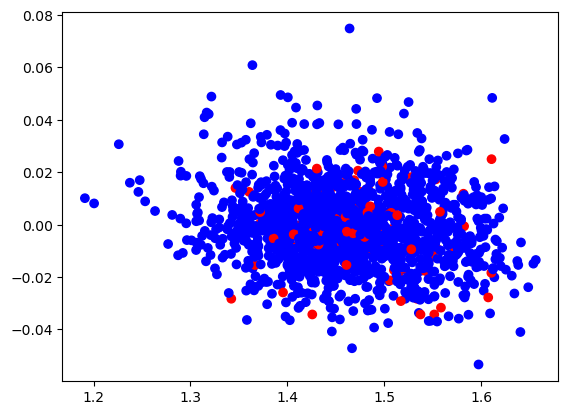

In [ ]:
cmap = {-1:'b', 1:'r'}
c = y.map(cmap)
plt.scatter(X.iloc[:,8], X.iloc[:,9], c=c)

<Axes: xlabel='0'>

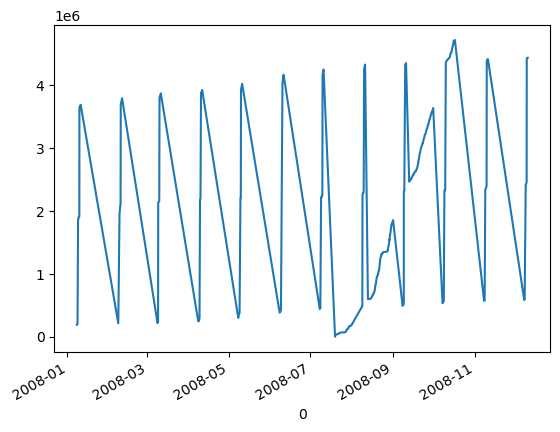

In [ ]:
z = X.iloc[:,0].cumsum()
z.plot()

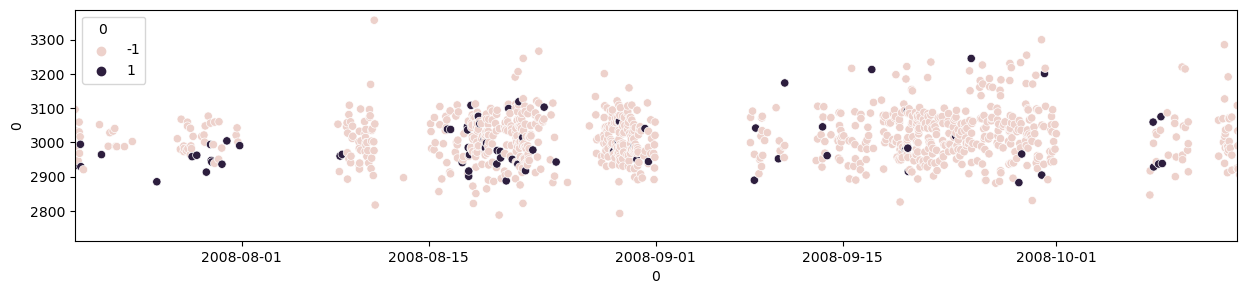

In [ ]:
fig = plt.figure(figsize=(15,3))
sns.scatterplot(data=X, x=X.index, y=0, hue=y)
plt.xlim(X.index[0], X.index[1500])
plt.show()

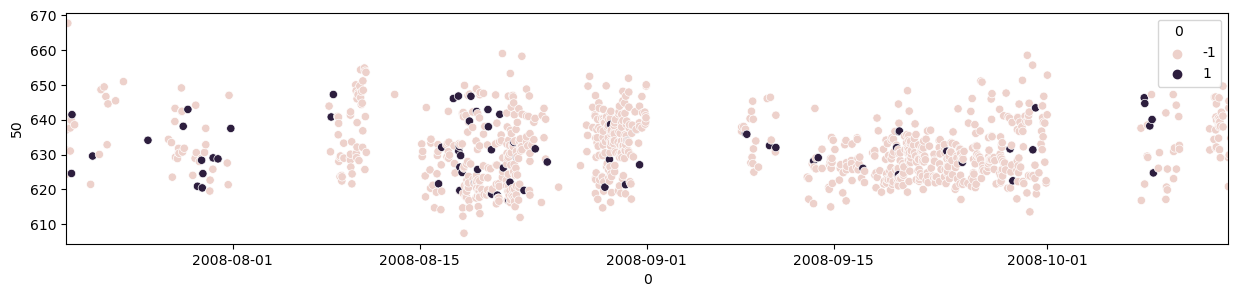

In [ ]:
fig = plt.figure(figsize=(15,3))
sns.scatterplot(data=X, x=X.index, y=50, hue=y)
plt.xlim(X.index[0], X.index[1500])
plt.show()

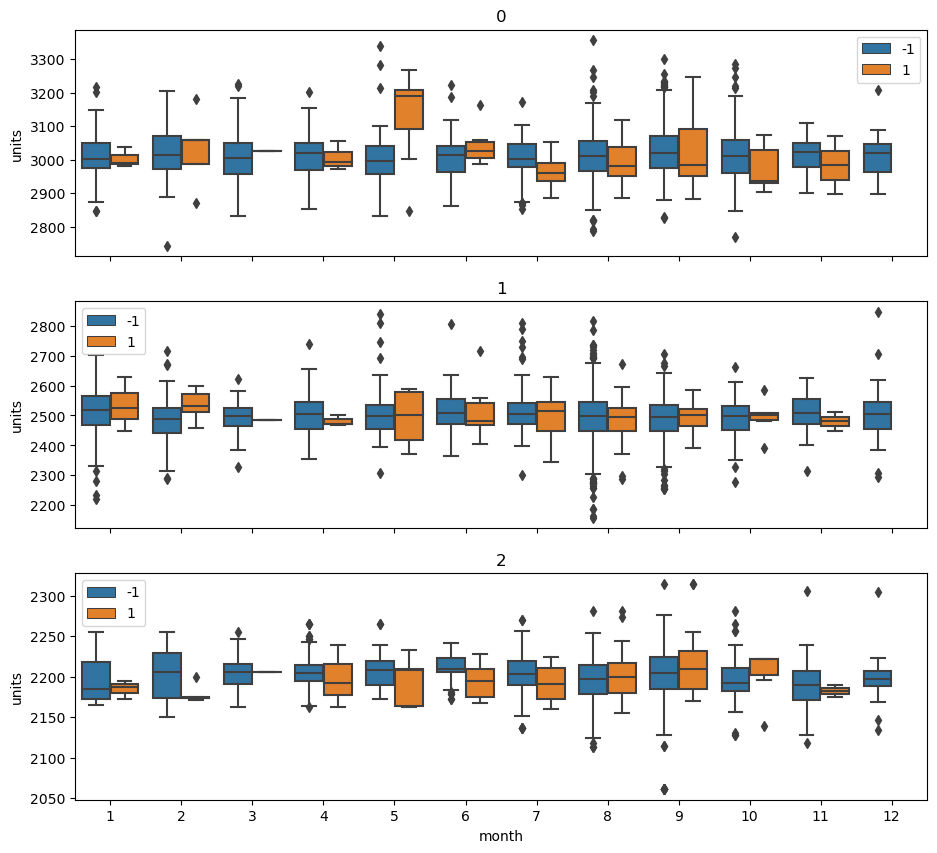

In [ ]:
fig, axes = plt.subplots(3,1, figsize = (11,10), sharex = True)

for name, ax in zip([0,1,2], axes):
    sns.boxplot(data=X, x='month', y=name, ax=ax, hue=y)

    ax.set_ylabel('units')
    ax.set_title(name)

    if ax!= axes[-1]:
        ax.set_xlabel('')

In [ ]:
X.isna().sum().sort_values(ascending=False).head(10)

rol_std_7D_0       6
rol_mean_7D_222    6
rol_mean_7D_234    6
rol_std_7D_234     6
rol_mean_7D_235    6
rol_std_7D_235     6
rol_mean_7D_236    6
rol_std_7D_236     6
rol_mean_7D_237    6
rol_std_7D_237     6
dtype: int64

In [ ]:
dummify_cols =['month', 'weekday', 'hour', 'work_shift']

X[['month', 'weekday', 'hour']] = X[['month', 'weekday', 'hour']].astype(str)
X = pd.concat([X.drop(dummify_cols, axis=1) , pd.get_dummies(X[dummify_cols])], axis=1)

print(X.shape)
X.head(2)

(1567, 3590)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,outside_95ci_0,outside_95ci_1,outside_95ci_2,outside_95ci_3,outside_95ci_4,outside_95ci_5,outside_95ci_6,outside_95ci_7,outside_95ci_8,outside_95ci_9,outside_95ci_10,outside_95ci_11,outside_95ci_12,outside_95ci_13,outside_95ci_14,outside_95ci_15,outside_95ci_16,outside_95ci_17,outside_95ci_18,outside_95ci_19,outside_95ci_20,outside_95ci_21,outside_95ci_22,outside_95ci_23,outside_95ci_24,outside_95ci_25,outside_95ci_26,outside_95ci_27,outside_95ci_28,outside_95ci_29,outside_95ci_30,outside_95ci_31,outside_95ci_32,outside_95ci_33,outside_95ci_34,outside_95ci_35,outside_95ci_36,outside_95ci_37,outside_95ci_38,outside_95ci_39,outside_95ci_40,outside_95ci_41,outside_95ci_42,outside_95ci_43,outside_95ci_44,outside_95ci_45,outside_95ci_46,outside_95ci_47,outside_95ci_48,outside_95ci_49,outside_95ci_50,outside_95ci_51,outside_95ci_52,outside_95ci_53,outside_95ci_54,outside_95ci_55,outside_95ci_56,outside_95ci_57,outside_95ci_58,outside_95ci_59,outside_95ci_60,outside_95ci_61,outside_95ci_62,outside_95ci_63,outside_95ci_64,outside_95ci_65,outside_95ci_66,outside_95ci_67,outside_95ci_68,outside_95ci_69,outside_95ci_70,outside_95ci_71,outside_95ci_72,outside_95ci_73,outside_95ci_74,outside_95ci_75,outside_95ci_76,outside_95ci_77,outside_95ci_78,outside_95ci_79,outside_95ci_80,outside_95ci_81,outside_95ci_82,outside_95ci_83,outside_95ci_84,outside_95ci_85,outside_95ci_86,outside_95ci_87,outside_95ci_88,outside_95ci_89,outside_95ci_90,outside_95ci_91,outside_95ci_92,outside_95ci_93,outside_95ci_94,outside_95ci_95,outside_95ci_96,outside_95ci_97,outside_95ci_98,outside_95ci_99,outside_95ci_100,outside_95ci_101,outside_95ci_102,outside_95ci_103,outside_95ci_104,outside_95ci_105,outside_95ci_106,outside_95ci_107,outside_95ci_108,outsid

In [ ]:
print(X.shape)
X = X[X.columns[(X.var(axis=0)>0).values]]

print(X.shape)

(1567, 3590)
(1567, 2882)


In [ ]:
x_corr = X.corr()**2
x_upper = x_corr.where(np.triu(np.ones(x_corr.shape), k=1).astype(np.bool))
# r2 > 0.7
drop_col = [col for col in x_upper.columns if any(x_upper[col] >0.70)]

/var/folders/nj/n73jpv6n6n38xcx5bdfnlflh0000gn/T/ipykernel_77546/2607188166.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_upper = x_corr.where(np.triu(np.ones(x_corr.shape), k=1).astype(np.bool))


In [ ]:
print(X.shape)
X = X.drop(X[drop_col], axis=1)

print(X.shape)

(1567, 2882)
(1567, 1143)


<Axes: >

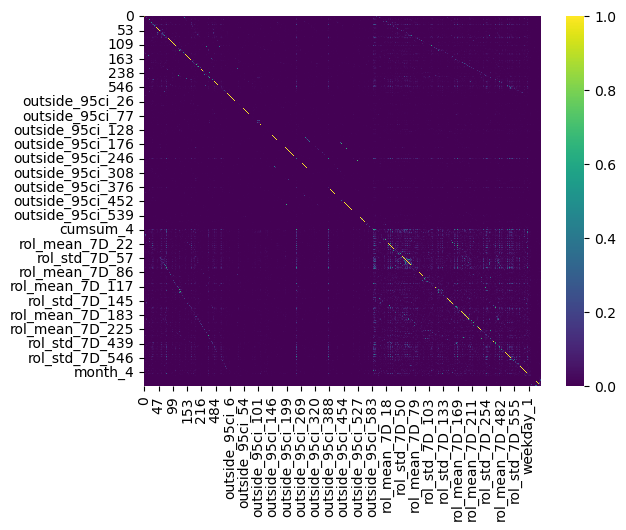

In [ ]:
x_corr = X.corr()**2
sns.heatmap(x_corr, cmap='viridis')

In [ ]:
X = X.fillna(0)

In [ ]:
y.value_counts()

-1    1463
 1     104
Name: 0, dtype: int64

In [ ]:
Xy = X.copy()
Xy['y'] = y.copy()
print(Xy.shape)

(1567, 1144)


In [ ]:
X_majority = Xy[Xy['y'] == -1]
X_minority = Xy[Xy['y'] == 1]

print(X_majority.shape, X_minority.shape)

(1463, 1144) (104, 1144)


In [ ]:
X_minority_upsampled = resample(X_minority, replace=True, n_samples=X_majority.shape[0], random_state=0)

print(X_minority_upsampled.shape)

(1463, 1144)


In [ ]:
X_upsampled = pd.concat([X_majority, X_minority_upsampled])

print(X_minority_upsampled.shape)
print(X_upsampled.shape)

(1463, 1144)
(2926, 1144)


In [ ]:
X_upsampled.columns

Index([                         0,                          1,
                                2,                          3,
                                4,                          6,
                                7,                          8,
                                9,                         10,
       ...
                         'hour_7',                   'hour_8',
                         'hour_9',    'work_shift_late_night',
       'work_shift_early_morning',       'work_shift_morning',
                'work_shift_noon',       'work_shift_evening',
               'work_shift_night',                        'y'],
      dtype='object', length=1144)

In [ ]:
Xup = X_upsampled[X_upsampled.columns[~X_upsampled.columns.isin(['y'])]]
Xup.shape

(2926, 1143)

In [ ]:
yup = X_upsampled['y']
yup.shape

(2926,)

In [ ]:
yup.value_counts()

-1    1463
 1    1463
Name: y, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(Xup, yup,
                                                   shuffle=True,
                                                   stratify=yup,
                                                   test_size=0.33)

print(x_train.shape, x_test.shape)

(1960, 1143) (966, 1143)


In [ ]:
def sep_ord_reg(df):
    ord_cols=[]

    for col in df.columns:
        if((df[col].unique().sum()==1) & (df[col].nunique()==2)):
            ord_cols.append(col)

    reg_cols = df.columns[~df.columns.isin(ord_cols)]

    return df[ord_cols], df[reg_cols]

In [ ]:
x_train_ord, x_train_reg  = sep_ord_reg(x_train)

x_test_ord = x_test[x_train_ord.columns]
x_test_reg = x_test[x_train_reg.columns]

print(x_train_reg.shape, x_test_reg.shape)

(1960, 678) (966, 678)


In [ ]:
x_train_ord.columns = x_train_ord.columns.astype(str)
x_train_reg.columns = x_train_reg.columns.astype(str)

x_test_ord.columns = x_test_ord.columns.astype(str)
x_test_reg.columns = x_test_reg.columns.astype(str)

In [ ]:
scl = preprocessing.StandardScaler()
scl.fit(x_train_reg)

StandardScaler()

In [ ]:
x_train_reg = scl.transform(x_train_reg)
x_test_reg = scl.transform(x_test_reg)

In [ ]:
x_train = np.concatenate([x_train_reg, np.array(x_train_ord)], axis=1)
x_test = np.concatenate([x_test_reg, np.array(x_test_ord)], axis=1)

print(x_train.shape, x_test.shape)

(1960, 1143) (966, 1143)


In [ ]:
clf = linear_model.LogisticRegression(max_iter=int(5e3))
clf.fit(x_train,y_train)

y_pred = clf.predict(x_test)

acu = metrics.accuracy_score(y_test, y_pred)
print('accuracy score: ', acu)

cm = metrics.confusion_matrix(y_test, y_pred)
cm

accuracy score:  0.9575569358178054


array([[442,  41],
       [  0, 483]])

In [ ]:
def fit_predict(clf):
    clf.fit(x_train, y_train)
    print(clf)

    y_pred = clf.predict(x_test)

    acu = metrics.accuracy_score(y_test, y_pred)
    print('accuracy score: ', acu)

    cm = metrics.confusion_matrix(y_test, y_pred)

    plt.show()
    print(cm)

    return acu, cm

model_list = [
    (linear_model.LogisticRegression(max_iter=int(5e3), penalty='elasticnet', solver='saga', l1_ratio=0.45), 'Logistic Regression'),
    (linear_model.LogisticRegressionCV(cv=3, max_iter=int(5e3),random_state=0), 'Logistic Regression CV'),
    (linear_model.LogisticRegressionCV(cv=3, max_iter=int(5e3),penalty='elasticnet', solver='saga', l1_ratios=[0.25, 0.45, 0.75], random_state=0), 'Logistic Regression CV'),
    (linear_model.RidgeClassifier(random_state=0), 'Ridge Classifier'),
    (linear_model.RidgeClassifierCV(alphas=[1e-3, 1e-2, .1, .4, .75, 1, 10]), 'Ridge Classifier CV'),
    (linear_model.SGDClassifier(random_state=0), 'SGD Classifier'),
    (linear_model.Perceptron(random_state=0), 'Perceptron'),
    (svm.LinearSVC(random_state=0), 'Linear SVC'),
    (LinearDiscriminantAnalysis(), 'LDA'),
    (QuadraticDiscriminantAnalysis(reg_param=0.5), 'QDA'),
    (linear_model.PassiveAggressiveClassifier(C=0.5, random_state=0), 'Passive Aggressive Classifier'),
    (RandomForestClassifier(random_state=0), 'Random Forest Classifier')
]

results = []
for clf, name in model_list:
    print('-'*25)
    print(name)
    print('-'*25)

    results.append((fit_predict(clf), name))

    print('-'*25, '\n\n')

-------------------------
Logistic Regression
-------------------------
LogisticRegression(l1_ratio=0.45, max_iter=5000, penalty='elasticnet',
                   solver='saga')
accuracy score:  0.9575569358178054
[[442  41]
 [  0 483]]
------------------------- 


-------------------------
Logistic Regression CV
-------------------------
LogisticRegressionCV(cv=3, max_iter=5000, random_state=0)
accuracy score:  0.9554865424430642
[[440  43]
 [  0 483]]
------------------------- 


-------------------------
Logistic Regression CV
-------------------------
LogisticRegressionCV(cv=3, l1_ratios=[0.25, 0.45, 0.75], max_iter=5000,
                     penalty='elasticnet', random_state=0, solver='saga')
accuracy score:  0.9565217391304348
[[441  42]
 [  0 483]]
------------------------- 


-------------------------
Ridge Classifier
-------------------------
RidgeClassifier(random_state=0)
accuracy score:  0.8768115942028986
[[364 119]
 [  0 483]]
------------------------- 


----------------

/Applications/anaconda3/envs/PyML/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=0)
accuracy score:  0.9575569358178054
[[442  41]
 [  0 483]]
------------------------- 


-------------------------
LDA
-------------------------
LinearDiscriminantAnalysis()
accuracy score:  0.7939958592132506
[[284 199]
 [  0 483]]
------------------------- 


-------------------------
QDA
-------------------------


/Applications/anaconda3/envs/PyML/lib/python3.11/site-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


QuadraticDiscriminantAnalysis(reg_param=0.5)
accuracy score:  0.9306418219461697
[[416  67]
 [  0 483]]
------------------------- 


-------------------------
Passive Aggressive Classifier
-------------------------
PassiveAggressiveClassifier(C=0.5, random_state=0)
accuracy score:  0.9585921325051759
[[443  40]
 [  0 483]]
------------------------- 


-------------------------
Random Forest Classifier
-------------------------
RandomForestClassifier(random_state=0)
accuracy score:  0.9927536231884058
[[476   7]
 [  0 483]]
------------------------- 


